BONUS ZADATAK IZ KVANTNE FIZIKE

Čestica mase m nalazi se u potencijalu

$$V(x) =
\begin{cases}
  V_0, & |x| > L \\
  0, & a \leq |x| \leq L \\
  V_1, & |x| < a \\
\end{cases}$$

pri čemu je $V_1 > V_0$. Izvedite jednadžbu iz koje biste izračunali energije vezanih stanja ovog
potencijala. Riješite tu jednadžbu grafički i numerički, izračunajte energije i valne funkcije
za tri najniža stanja te nacrtajte dobijene valne funkcije. Izračunajte očekivane vrijednosti
$\langle x \rangle$, $\langle x^2 \rangle$, $\langle p \rangle$ i $\langle p^2 \rangle$, kao i produkt neodređenosti $\Delta x \Delta p$ za osnovno stanje. Provjerite točnost
dobijenih rezultata koristeći shooting metodu. Što se događa s energijom i valnom funkcijom
osnovnog stanja ako barijera u sredini jame postaje sve viša i uža tj. teži prema $\delta$-funkciji?

In [1]:
import numpy as np
import pylab as plt
from scipy.optimize import brentq
from scipy.integrate import simps,odeint

In [2]:
AA=8.6375   #m/hbar
BB=13.12     #m/hbar**2
hbar=AA/BB
m=AA*hbar

In [3]:
V0=0.5
V1=0.9
a=0.1
L=4

In [4]:
def funk_par(Energija):
    k1=np.sqrt(2*m*(V1-abs(Energija))/hbar**2)
    k2=np.sqrt(2*m*abs(Energija)/hbar**2)
    k3=np.sqrt(2*m*(V0-abs(Energija))/hbar**2)
    ret=k1*np.sinh(k1*a)*(k3*np.sin(k2*(L-a))+k2*np.cos(k2*(L-a)))-k2*np.cosh(k1*a)*(k2*np.sin(k2*(L-a))-k3*np.cos(k2*(L-a)))
    return ret

def funk_npar(Energija):
    k1=np.sqrt(2*m*(V1-abs(Energija))/hbar**2)
    k2=np.sqrt(2*m*abs(Energija)/hbar**2)
    k3=np.sqrt(2*m*(V0-abs(Energija))/hbar**2)
    ret=k1*np.cosh(k1*a)*(k3*np.sin(k2*(L-a))+k2*np.cos(k2*(L-a)))-k2*np.sinh(k1*a)*(k2*np.sin(k2*(L-a))-k3*np.cos(k2*(L-a)))
    return ret

def calc_coef(Energija):
    k1=np.sqrt(2*m*(V1-abs(Energija))/hbar**2)
    k2=np.sqrt(2*m*abs(Energija)/hbar**2)
    k3=np.sqrt(2*m*(V0-abs(Energija))/hbar**2)
    B=1.0
    C=B*(k2*np.cosh(k1*a)*np.sin(k2*a)+k1*np.sinh(k1*a)*np.cos(k2*a))/(k2*np.cosh(k1*a)*np.cos(k2*a)-k1*np.sinh(k1*a)*np.sin(k2*a))
    A=(B*np.cos(k2*a) + C*np.sin(k2*a))/np.cosh(k1*a)
    D=(B*np.cos(k2*L) + C*np.sin(k2*L))/np.exp(-k3*L)
    return A,B,C,D

def calc_coef_npar(Energija):
    k1=np.sqrt(2*m*(V1-abs(Energija))/hbar**2)
    k2=np.sqrt(2*m*abs(Energija)/hbar**2)
    k3=np.sqrt(2*m*(V0-abs(Energija))/hbar**2)
    B=1.0
    C=B*(k1*np.cosh(k1*a)*np.cos(k2*a)+k2*np.sinh(k1*a)*np.sin(k2*a))/(k2*np.sinh(k1*a)*np.cos(k2*a)-k1*np.cosh(k1*a)*np.sin(k2*a))
    A=(B*np.cos(k2*a) + C*np.sin(k2*a))/np.sinh(k1*a)
    D=(B*np.cos(k2*L) + C*np.sin(k2*L))/np.exp(-k3*L)
    return A,B,C,D

def calc_wf(x,Energija,A,B,C,D):
    k1=np.sqrt(2*m*(V1-abs(Energija))/hbar**2)
    k2=np.sqrt(2*m*abs(Energija)/hbar**2)
    k3=np.sqrt(2*m*(V0-abs(Energija))/hbar**2)
    if x<-L or x>L:
        return D*np.exp(-k3*abs(x))
    elif x>-a and x < a:
        return A*np.cosh(k1*x)
    else:
        return C*np.sin(k2*abs(x))+B*np.cos(k2*x)
    
def calc_der_wf(x,Energija,A,B,C,D):
    k1=np.sqrt(2*m*(V1-abs(Energija))/hbar**2)
    k2=np.sqrt(2*m*abs(Energija)/hbar**2)
    k3=np.sqrt(2*m*(V0-abs(Energija))/hbar**2)
    if x<-L or x>L:
        return -k3*np.sign(x)*D*np.exp(-k3*abs(x))
    elif x>-a and x < a:
        return k1*A*np.sinh(k1*x)
    else:
        return k2*(np.sign(x)*C*np.cos(k2*x)-B*np.sin(k2*x))
    
def calc_wf_npar(x,Energija,A,B,C,D):
    k1=np.sqrt(2*m*(V1-abs(Energija))/hbar**2)
    k2=np.sqrt(2*m*abs(Energija)/hbar**2)
    k3=np.sqrt(2*m*(V0-abs(Energija))/hbar**2)
    if x<-L or x>L:
        return np.sign(x)*D*np.exp(-k3*abs(x))
    elif x>-a and x < a:
        return A*np.sinh(k1*x)
    else:
        return C*np.sin(k2*x)+np.sign(x)*B*np.cos(k2*x)
    
def calc_der_wf_npar(x,Energija,A,B,C,D):
    k1=np.sqrt(2*m*(V1-abs(Energija))/hbar**2)
    k2=np.sqrt(2*m*abs(Energija)/hbar**2)
    k3=np.sqrt(2*m*(V0-abs(Energija))/hbar**2)
    if x<-L or x>L:
        return -k3*D*np.exp(-k3*abs(x))
    elif x>-a and x < a:
        return k1*A*np.cosh(k1*x)
    else:
        return k2*(C*np.cos(k2*x)-np.sign(x)*B*np.sin(k2*x))

In [5]:
dE=V0/10000

energije=np.arange(0,0.1,dE)
fvalp=funk_par(energije)
fvaln=funk_npar(energije)

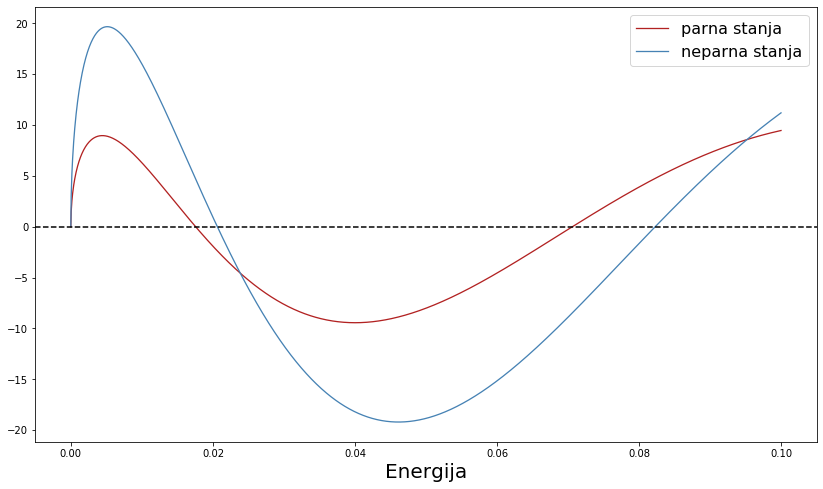

In [22]:
fig, ax = plt.subplots(figsize=[14,8])
ax.plot(energije,fvalp,color='firebrick',lw=1.3,ls='-',label='parna stanja')
ax.plot(energije,fvaln,color='steelblue',lw=1.3,ls='-',label='neparna stanja')
ax.axhline(y=0.0,ls='--',color='black')
ax.set_xlabel('Energija', fontsize=20)
plt.legend(fontsize=16)

In [7]:
E1=brentq(funk_par,0.01,0.02)
print('E1=',E1)
A,B,C,D = calc_coef(E1)
print('A=',A)
print('B=',B)
print('C=',C)
print('D=',D)
0.017102223352671787

E1= 0.01756202385571318
A= 1.1427983173986709
B= 1.0
C= 4.127583098905416
D= 1207024.4063273785


0.017102223352671787

In [8]:
Xmin=-1.3*L
Xmax=1.3*L
dx=L/100
xmesh=np.arange(Xmin,Xmax,dx)
wf_1=[]
der_wf_1=[]
for x in xmesh:
    wf_1.append(calc_wf(x,E1,A,B,C,D))
    der_wf_1.append(calc_der_wf(x,E1,A,B,C,D))
    
wf_1=np.array(wf_1)
der_wf_1=np.array(der_wf_1)
norma=simps(wf_1**2,xmesh)
wf_1 = wf_1/np.sqrt(norma)
der_wf_1 = der_wf_1/np.sqrt(norma)

#za usporedbu sa shooting metodom
Y=wf_1
X=xmesh

In [9]:
E2=brentq(funk_npar,0.01,0.03)
print('E2=',E2)
A,B,C,D = calc_coef_npar(E2)
print('A=',A)
print('B=',B)
print('C=',C)
print('D=',D)
wf_2=[]
der_wf_2=[]
for x in xmesh:
    wf_2.append(calc_wf_npar(x,E2,A,B,C,D))
    der_wf_2.append(calc_der_wf_npar(x,E2,A,B,C,D))
    
wf_2=np.array(wf_2)
der_wf_2=np.array(der_wf_2)
norma=simps(wf_2**2,xmesh)
wf_2 = wf_2/np.sqrt(norma)
der_wf_2 = der_wf_2/np.sqrt(norma)

E2= 0.020621117651194863
A= -25.85785690039932
B= 1.0
C= -189.1566772394484
D= -55680606.542543165


In [10]:
E3=brentq(funk_par,0.06,0.08)
print('E3=',E3)
A,B,C,D = calc_coef(E3)
print('A=',A)
print('B=',B)
print('C=',C)
print('D=',D)
wf_3=[]
der_wf_3=[]
for x in xmesh:
    wf_3.append(calc_wf(x,E3,A,B,C,D))
    der_wf_3.append(calc_der_wf(x,E3,A,B,C,D))
wf_3=np.array(wf_3)
der_wf_3=np.array(der_wf_3)
norma=simps(wf_3**2,xmesh)
wf_3 = wf_3/np.sqrt(norma)
der_wf_3 = der_wf_3/np.sqrt(norma)

E3= 0.0705853497133933
A= 1.1420573860094674
B= 1.0
C= 2.04793364195398
D= -580650.3441402182


In [11]:
potencijal=[]
for x in xmesh:
    if x<-L or x>L:
        potencijal.append(V0)
    elif x>-a and x<a:
        potencijal.append(V1)
    else:
        potencijal.append(0.0)
potencijal=np.array(potencijal)

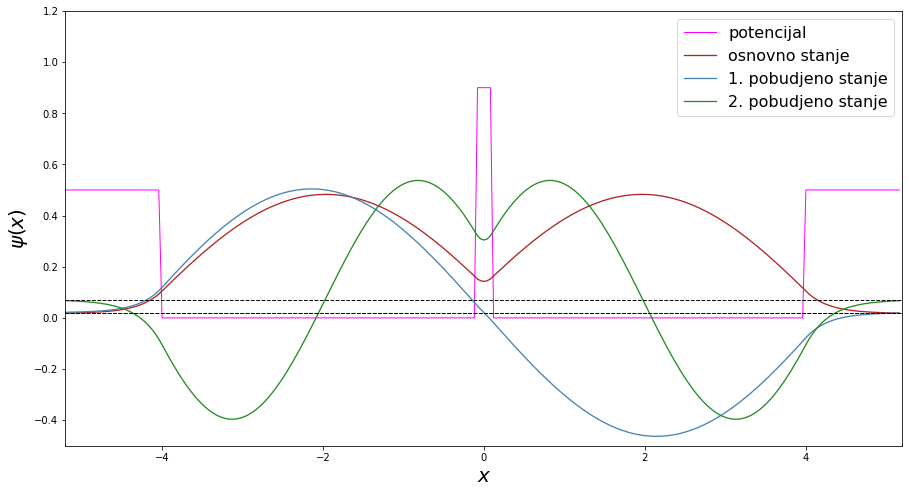

In [12]:
fig2=plt.figure(2,figsize=(15,8))
plt.plot(xmesh,potencijal,color='magenta',lw=1,ls='-',label='potencijal')
plt.plot(xmesh,E1+wf_1,color='firebrick',lw=1.3,ls='-',label='osnovno stanje')
plt.plot(xmesh,E2+wf_2,color='steelblue',lw=1.3,ls='-',label='1. pobudjeno stanje')
plt.plot(xmesh,E3+wf_3,color='forestgreen',lw=1.3,ls='-',label='2. pobudjeno stanje')
plt.axhline(y=E1,ls='--',lw=1,color='black')
plt.axhline(y=E2,ls='--',lw=1,color='black')
plt.axhline(y=E3,ls='--',lw=1,color='black')
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$\psi(x)$',fontsize=20)
plt.ylim(-0.5,1.2)
plt.xlim(Xmin,Xmax)
plt.legend(fontsize=16)

In [13]:
xav_1=simps(xmesh*wf_1**2,xmesh)
xav_2=simps(xmesh*wf_2**2,xmesh)
xav_3=simps(xmesh*wf_3**2,xmesh)
x2av_1=simps(xmesh**2*wf_1**2,xmesh)
x2av_2=simps(xmesh**2*wf_2**2,xmesh)
x2av_3=simps(xmesh**2*wf_3**2,xmesh)
print('xav_1=',xav_1)
print('xav_2=',xav_2)
print('xav_3=',xav_3)
print('x2av_1=',x2av_1)
print('x2av_2=',x2av_2)
print('x2av_3=',x2av_3)

xav_1= -3.561911854367744e-07
xav_2= -4.641553794683606e-07
xav_3= -2.315130202561885e-06
x2av_1= 4.57782271204405
x2av_2= 5.198782251640557
x2av_3= 5.494504728683972


In [14]:
pav_1=-1j*hbar*simps(wf_1*der_wf_1,xmesh)
pav_2=-1j*hbar*simps(wf_2*der_wf_2,xmesh)
pav_3=-1j*hbar*simps(wf_3*der_wf_3,xmesh)
p2av_1=+hbar**2*simps(der_wf_1**2,xmesh)
p2av_2=+hbar**2*simps(der_wf_2**2,xmesh)
p2av_3=+hbar**2*simps(der_wf_3**2,xmesh)
print('pav_1=',pav_1)
print('pav_2=',pav_2)
print('pav_3=',pav_3)
pav_1=0.0 #razlika od nule dolazi samo od numerike
pav_2=0.0 #razlika od nule dolazi samo od numerike
pav_3=0.0 #razlika od nule dolazi samo od numerike
print('p2av_1=',p2av_1)
print('p2av_2=',p2av_2)
print('p2av_3=',p2av_3)

pav_1= -1.6108336452541992e-07j
pav_2= -2.092423239718624e-07j
pav_3= -9.877809411291032e-07j
p2av_1= 0.1528622121218547
p2av_2= 0.21840165059700903
p2av_3= 0.6301683608944544


In [15]:
delta_x_1 = np.sqrt(x2av_1-xav_1**2)
delta_x_2 = np.sqrt(x2av_2-xav_2**2)
delta_x_3 = np.sqrt(x2av_3-xav_3**2)
delta_p_1 = np.sqrt(p2av_1-pav_1**2)
delta_p_2 = np.sqrt(p2av_2-pav_2**2)
delta_p_3 = np.sqrt(p2av_3-pav_3**2)
print('Produkt neodredjenosti, osnovno stanje: ',delta_x_1*delta_p_1)
print('Produkt neodredjenosti, prvo pobudjeno stanje: ',delta_x_2*delta_p_2)
print('Produkt neodredjenosti, drugo pobudjeno stanje: ',delta_x_3*delta_p_3)
print('Minimalna neodredjenost: ',hbar/2)

Produkt neodredjenosti, osnovno stanje:  0.8365262138538769
Produkt neodredjenosti, prvo pobudjeno stanje:  1.0655621168438214
Produkt neodredjenosti, drugo pobudjeno stanje:  1.8607694749211225
Minimalna neodredjenost:  0.3291730182926829


In [16]:
Xmatch=3*L/4
dx1=(Xmatch-Xmin)/100
xmesh1=np.arange(Xmin,Xmatch+dx1/2,dx1)
npts1=len(xmesh1)
print(xmesh1[npts1-1])
dx2=(Xmax-Xmatch)/100
xmesh2=np.arange(Xmax,Xmatch-dx2/2,-dx2)
npts2=len(xmesh2)
print(xmesh2[npts2-1])

def pot(x):
    if x<-L or x>L:
        return V0
    elif x>-a and x<a:
        return V1
    else:
        return 0.0

def func(y,x,energija):
    psi=y[0]
    dpsi=y[1]
    v=pot(x)
    d2psi=(2*m/hbar**2)*(v-energija)*psi
    return [dpsi,d2psi]

2.999999999999985
2.999999999999976


In [17]:
def shoot_par(Energija):
    k1=np.sqrt(2*m*(V1-abs(Energija))/hbar**2)
    k3=np.sqrt(2*m*(V0-abs(Energija))/hbar**2)
    
    psi0=np.cosh(k1*Xmin)
    dpsi0=k1*np.sinh(k1*Xmin)
    ini=[psi0,dpsi0]
    sol1=odeint(func,ini,xmesh1,args=(Energija,))
    
    psi0=np.exp(-k3*Xmax)
    dpsi0=-k3*np.exp(-k3*Xmax)
    ini=[psi0,dpsi0]
    sol2=odeint(func,ini,xmesh2,args=(Energija,))   
    
    sol2[npts2-1,1]=sol2[npts2-1,1]*(sol1[npts1-1,0]/sol2[npts2-1,0])
    
    diff = sol2[npts2-1,1]-sol1[npts1-1,1]
    
    return diff

def shoot_npar(Energija):
    k1=np.sqrt(2*m*(V1-abs(Energija))/hbar**2)
    k3=np.sqrt(2*m*(V0-abs(Energija))/hbar**2)
    
    psi0=np.cosh(k1*Xmin)
    dpsi0=k1*np.sinh(k1*Xmin)
    ini=[psi0,dpsi0]
    sol1=odeint(func,ini,xmesh1,args=(Energija,))
    
    psi0=np.exp(-k3*Xmax)
    dpsi0=-k3*np.exp(-k3*Xmax)
    ini=[psi0,dpsi0]
    sol2=odeint(func,ini,xmesh2,args=(Energija,))   
    
    sol2[npts2-1,1]=sol2[npts2-1,1]*(sol1[npts1-1,0]/sol2[npts2-1,0])
    
    diff = sol2[npts2-1,1]-sol1[npts1-1,1]
    
    return diff

In [18]:
E1=brentq(shoot_par,0.01,0.019)
print('E1 = ',E1)
E2=brentq(shoot_npar,0.019,0.021)
print('E2 = ',E2)
E3=brentq(shoot_par,0.06,0.08)
print('E3 = ',E3)

E1 =  0.01757178178452618
E2 =  0.020626353156604535
E3 =  0.07058374519700776


In [19]:
Xmatch1=-3*L/4
Xmatch2=0
Xmatch3=3*L/4

dx1=(Xmatch1-Xmin)/100
xmesh1=np.arange(Xmin,Xmatch1+dx1/100,dx1)
npts1=len(xmesh1)
print(xmesh1[npts1-1])

dx2=(Xmatch2-Xmatch1)/100
xmesh2=np.arange(Xmatch2+dx2/100,Xmatch1-dx2/100,-dx2)
npts2=len(xmesh2)
print(xmesh2[npts2-1])

dx3=(Xmatch3-Xmatch2)/100
xmesh3=np.arange(Xmatch2-dx3/100,Xmatch3+dx3/100,dx3)
npts3=len(xmesh3)
print(xmesh3[npts3-1])

dx4=(Xmax-Xmatch3)/100
xmesh4=np.arange(Xmax,Xmatch3-dx4/100,-dx4)
npts4=len(xmesh4)
print(xmesh4[npts4-1])

def pot(x):
    if x<-L or x>L:
        return V0
    elif x>-a and x<a:
        return V1
    else:
        return 0.0

def func(y,x,energija):
    psi=y[0]
    dpsi=y[1]
    v=pot(x)
    d2psi=(2*m/hbar**2)*(v-energija)*psi
    return [dpsi,d2psi]

-2.999999999999976
-2.9997
2.9997
2.999999999999976


In [20]:
Energija=E1
k1=np.sqrt(2*m*(V1-abs(Energija))/hbar**2)
k2=np.sqrt(2*m*abs(Energija)/hbar**2)
k3=np.sqrt(2*m*(V0-abs(Energija))/hbar**2)

psi0=np.exp(k3*Xmin)
dpsi0=k3*np.exp(k3*Xmin)
ini=[psi0,dpsi0]
sol1=odeint(func,ini,xmesh1,args=(Energija,))
    
psi0=1
dpsi0=0
ini=[psi0,dpsi0]
sol2=odeint(func,ini,xmesh2,args=(Energija,)) 

psi0=1
dpsi0=0
ini=[psi0,dpsi0]
sol3=odeint(func,ini,xmesh3,args=(Energija,))
    
psi0=np.exp(-k3*Xmax)
dpsi0=-k3*np.exp(-k3*Xmax)
ini=[psi0,dpsi0]
sol4=odeint(func,ini,xmesh4,args=(Energija,)) 
      
sol2[:,0]=(sol1[npts1-1,0]/sol2[npts2-1,0])*sol2[:,0]
sol4[:,0]=(sol3[npts3-1,0]/sol4[npts4-1,0])*sol4[:,0]
wf_1 = sol1[:,0]
wf_2 = sol2[:,0]
wf_3 = sol3[:,0]
wf_4 = sol4[:,0]
norma1 = 2*simps(wf_1**2,xmesh1)-2*simps(wf_2**2,xmesh2)
norma2 = 2*simps(wf_3**2,xmesh3)-2*simps(wf_4**2,xmesh4)
wf_1 = wf_1/np.sqrt(norma1)
wf_2 = wf_2/np.sqrt(norma1)
wf_3 = wf_3/np.sqrt(norma2)
wf_4 = wf_4/np.sqrt(norma2)

(-5.2, 5.2)

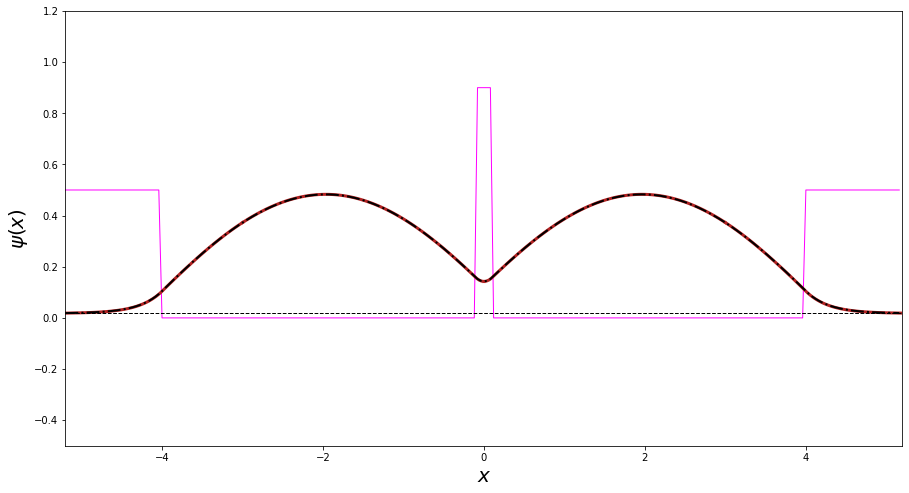

In [21]:
fig1=plt.figure(1,figsize=(15,8))
plt.plot(xmesh,potencijal,color='magenta',lw=1,ls='-')
plt.plot(xmesh1,E1+wf_1,color='firebrick',lw=3,ls='-')
plt.plot(xmesh2,E1+wf_2,color='firebrick',lw=3,ls='-')
plt.plot(xmesh3,E1+wf_3,color='firebrick',lw=3,ls='-')
plt.plot(xmesh4,E1+wf_4,color='firebrick',lw=3,ls='-')
plt.plot(X,E1+Y,color='black',lw=2,ls='-.') #numericko rjesenje s pocetka
plt.axhline(y=E1,ls='--',lw=1,color='black')
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$\psi(x)$',fontsize=20)
plt.ylim(-0.5,1.2)
plt.xlim(Xmin,Xmax)